<a href="https://colab.research.google.com/github/yunjeong-chang/2021_MachineVision/blob/main/Gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

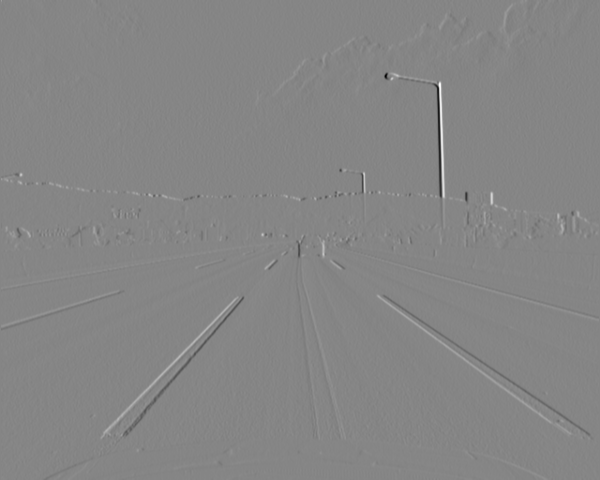

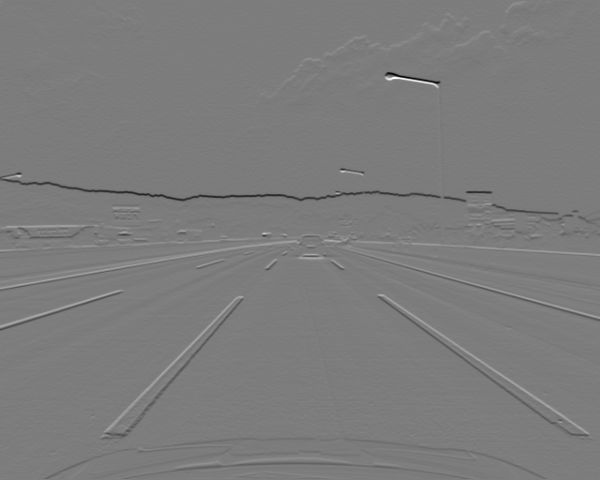

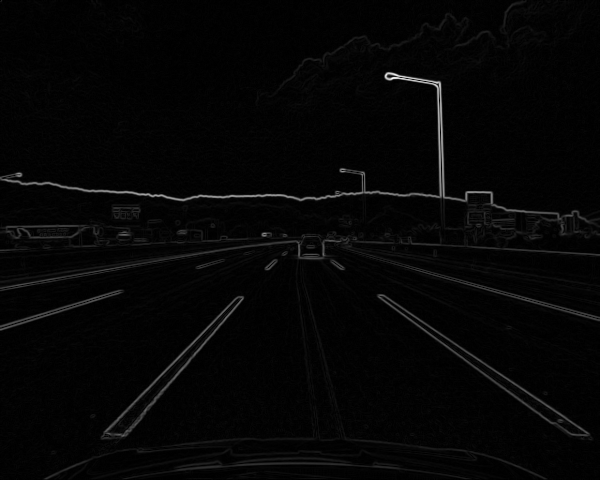

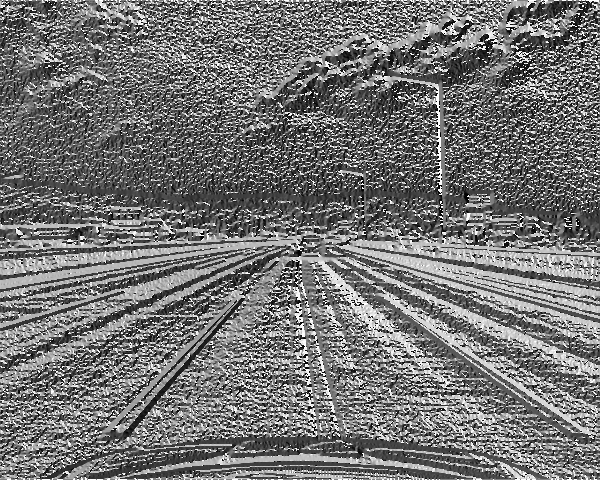

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

img = cv.imread('/content/drive/MyDrive/MachineVision/samples/lanes.bmp',cv.IMREAD_GRAYSCALE)

Ix = cv.Sobel(img,ddepth=cv.CV_64F,dx=1,dy=0,ksize=3)
Iy = cv.Sobel(img,ddepth=cv.CV_64F,dx=0,dy=1,ksize=3)
# Gradient Magnitude
mag = np.sqrt(np.square(Ix) + np.square(Iy)) 
# Gradient Direction
ori = np.arctan2(Iy,Ix) * 180/np.pi  # 출력 : -180~+180 degrees

# For display only (Like Gray Scale Image)
Ix_ = (Ix-Ix.min()) / (Ix.max()-Ix.min()) * 255 
Iy_ = (Iy-Iy.min()) / (Iy.max()-Iy.min()) * 255
mag_ = (mag-mag.min()) / (mag.max()-mag.min()) * 255
ori_ = (ori-ori.min()) / (ori.max()-ori.min()) * 255

cv_imshow(Ix_)
cv_imshow(Iy_)
cv_imshow(mag_)
cv_imshow(ori_)

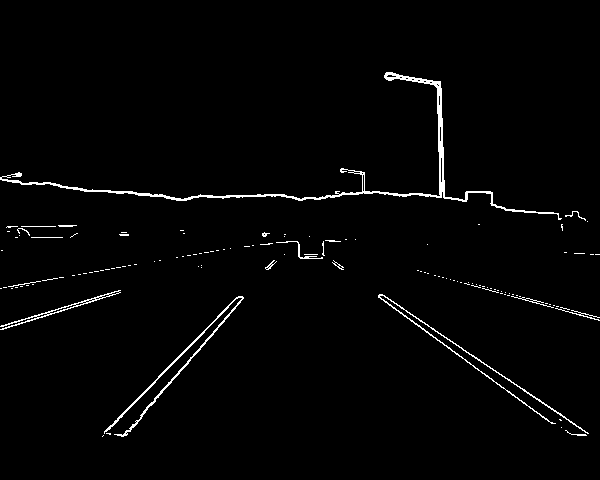

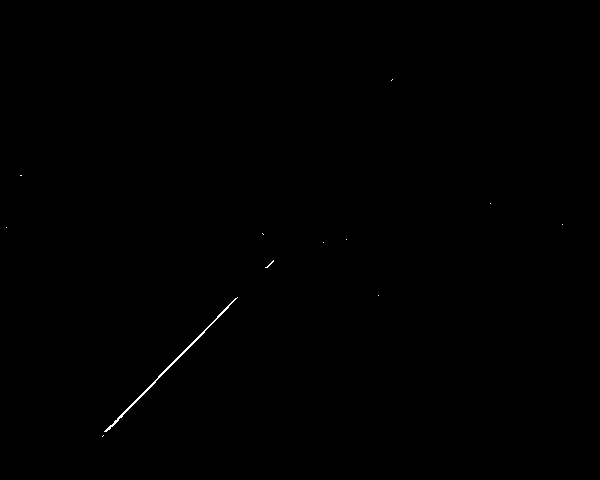

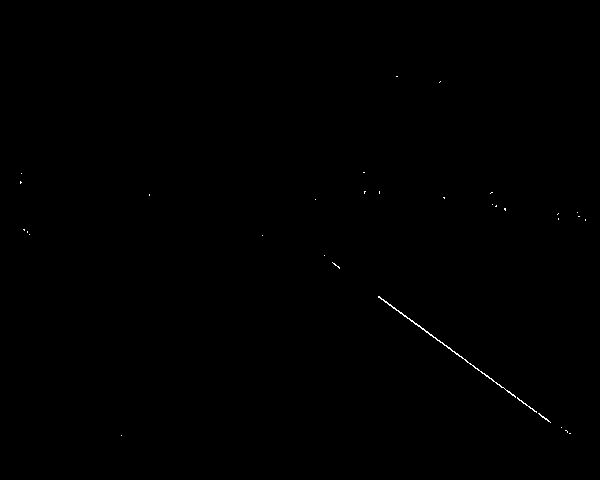

In [2]:
# Magnitude가 큰 위치를 찾아 흰색으로
result1 = np.zeros(img.shape)
id = np.where(mag > 100) 
result1[id] = 255

result2 = np.zeros(img.shape)
id = np.where((mag>100) & (ori>30) & (ori<60))
result2[id] = 255

result3 = np.zeros(img.shape)
id = np.where((mag>100) & (ori>-60) & (ori<-30))
result3[id] = 255

cv_imshow(result1)
cv_imshow(result2)
cv_imshow(result3)